In [51]:
# python 3.12

from transformers import pipeline
import torch
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import time

### Loading local image

In [ ]:
# loading image

image = Image.open(r"imagesample.jpg") # testing with realistic close range scene
# image = Image.open(r"imagesample2.jpeg") # testing with realistic far range scene
image

### Live video capture

In [ ]:
cameraCap = cv2.VideoCapture(0)

while True:
    ret, frame = cameraCap.read()
    
    cv2.imshow('frame', frame) 
    time.sleep(6)

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

### Variations of depth estimation model

In [ ]:
# AI depth estimation with small model

pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")
result = pipe(image)
result["depth"]

In [ ]:
# AI depth estimation with base model

pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-base-hf")
result = pipe(image)
result["depth"]

In [ ]:
# AI depth estimation with v2 small

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")
result = pipe(image)
result["depth"]

In [4]:
# AI depth estimation with v2 base

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Base-hf")
result = pipe(image)
depthimage = result["depth"]

### Image processing and identifying closest object

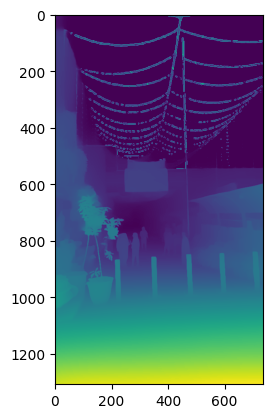

In [49]:
depthimagearray = np.array(depthimage)
blurimage = cv2.GaussianBlur(depthimagearray,(5,5),0)
min, max, micloc, maxloc = cv2.minMaxLoc(blurimage)

# print(maxloc, max)
# cv2.circle(depthimagearray, maxloc, 100, (255, 255, 255), 100)

plt.imshow(depthimagearray)
plt.show()

In [48]:
# assuming camera field of view is 80°

imageWidth = depthimagearray.shape[1]
cameraFOV = 80

# x:maxloc[0]::80:736
depthAngle = (maxloc[0]*cameraFOV)/imageWidth

print(f'closest object at {5 * round(round(depthAngle) / 5)} degrees')

closest object at 75 degrees
